In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
# from pathlib import Path
import pandas as pd
from prepare_data.data_loader import load_data
import matplotlib.pyplot as plt


df, json_data = load_data('../data/raw/_annotations.coco.json')
df.head()

,category_id,category_name,supercategory,id,license,file_name,height,width,date_captured,extra.name,image_id,bbox,area,segmentation,iscrowd
0,1,fire,wildfire,0,1,cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,cl6e1qges001kgk555z158f33_2_FALSE_COLOR.jpg,1,"[277, 207, 568.95, 591.79]",336698.921,[],0
1,1,fire,wildfire,1,1,cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR.jpg,2,"[800, 0, 157.45, 413.38]",65086.681,[],0
2,1,fire,wildfire,2,1,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR.jpg,2,"[1062, 96, 58.37, 63.91]",3730.427,[],0
3,1,fire,wildfire,3,1,cl6b6pieh007rl455fwvb73gr_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,cl6b6pieh007rl455fwvb73gr_1_TRUE_COLOR.jpg,2,"[452, 442, 410.09, 350.6]",143777.554,[],0
4,1,fire,wildfire,4,1,cl6b5k38g003zl455bgtd1317_4_FALSE_COLOR__URBAN...,860,1200,2025-09-14T12:06:19+00:00,cl6b5k38g003zl455bgtd1317_4_FALSE_COLOR__URBAN...,2,"[0, 163, 336.16, 375.08]",126086.893,[],0


In [3]:
def explore_data(df, json_data):
    n_images = len(json_data['images'])
    n_annotations = len(json_data['annotations'])
    n_categories = len(json_data['categories'])
    category_names = df['category_name'].unique()
    images_height = [image['height'] for image in json_data['images']]
    images_width = [image['width'] for image in json_data['images']]
    annotations_per_image = df.groupby('image_id').size()

    print(f'NUMBER OF IMAGES -> {n_images}')
    print(f'NUMBER OF ANNOTATIONS -> {n_annotations}')
    print(
        f'ANNOTATIONS PER IMAGE -> MIN: {min(annotations_per_image)}, MAX: {max(annotations_per_image)}, AVG: {annotations_per_image.mean():.2f}'
    )
    print(f'\nNUMBER OF CATEGORIES -> {n_categories}')
    print(f'UNIQUE CATEGORY NAMES -> {category_names}')
    print(
        f'\nHEIGHT VALUES -> MIN: {min(images_height)}, MAX: {max(images_height)}, AVG: {sum(images_height) / len(images_height)}'
    )
    print(
        f'WIDTH VALUES -> MIN: {min(images_width)}, MAX: {max(images_width)}, AVG: {sum(images_width) / len(images_width)}'
    )
    if min(images_height) == max(images_height) and min(images_width) == max(
        images_width
    ):
        print('-> All images are the same size.')


explore_data(df, json_data)

NUMBER OF IMAGES -> 500
NUMBER OF ANNOTATIONS -> 959
ANNOTATIONS PER IMAGE -> MIN: 1, MAX: 7, AVG: 1.99

NUMBER OF CATEGORIES -> 2
UNIQUE CATEGORY NAMES -> ['fire']

HEIGHT VALUES -> MIN: 860, MAX: 860, AVG: 860.0
WIDTH VALUES -> MIN: 1200, MAX: 1200, AVG: 1200.0
-> All images are the same size.


In [4]:
def get_basic_informations(json_data):
    n_images = len(json_data['images'])
    n_annotations = len(json_data['annotations'])
    n_categories = len(json_data['categories'])
    category_names = df['category_name'].unique()
    print(f'NUMBER OF IMAGES -> {n_images}')
    print(f'NUMBER OF ANNOTATIONS -> {n_annotations}')
    print(f'NUMBER OF CATEGORIES -> {n_categories}')
    print(f'UNIQUE CATEGORY NAMES -> {category_names}')


get_basic_informations(json_data)

NUMBER OF IMAGES -> 500
NUMBER OF ANNOTATIONS -> 959
NUMBER OF CATEGORIES -> 2
UNIQUE CATEGORY NAMES -> ['fire']


ANNOTATIONS PER IMAGE -> MIN: 1, MAX: 7, AVG: 1.99


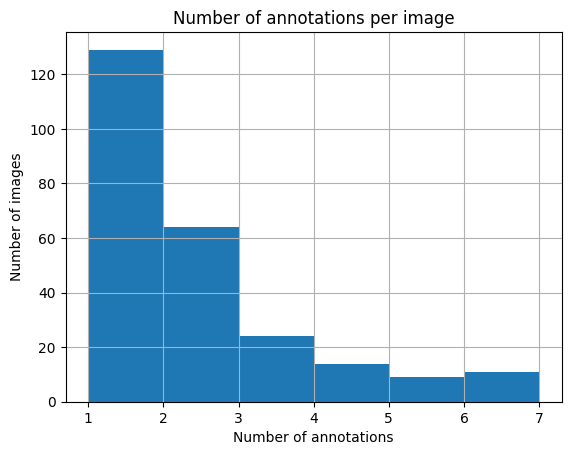

In [5]:
def get_annotations_per_image(df):
    annotations_per_image = df.groupby('image_id').size()
    print(
        f'ANNOTATIONS PER IMAGE -> MIN: {min(annotations_per_image)}, MAX: {max(annotations_per_image)}, AVG: {annotations_per_image.mean():.2f}'
    )
    annotations_per_image.hist(bins='auto')
    plt.title('Number of annotations per image')
    plt.xlabel('Number of annotations')
    plt.ylabel('Number of images')
    plt.show()


get_annotations_per_image(df)

In [6]:
def get_n_images_per_category(df):
    images_per_category = df.groupby('category_name')['image_id'].nunique()
    display(df.groupby('category_name')['image_id'].unique().head(20))
    print(f'NUMBER OF IMAGES PER CATEGORY:\n{images_per_category}')


get_n_images_per_category(df)

category_name
fire    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: image_id, dtype: object

NUMBER OF IMAGES PER CATEGORY:
category_name
fire    251
Name: image_id, dtype: int64


IMAGE WIDTH -> MIN: 1200, MAX: 1200, AVG: 1200.0
IMAGE HEIGHT -> MIN: 860, MAX: 860, AVG: 860.0
-> All images are the same size.

BBOX WIDTH -> MIN: 0.19, MAX: 1200.00, AVG: 265.89
BBOX HEIGHT -> MIN: 1.09, MAX: 860.00, AVG: 248.97
BBOX AREA -> MIN: 0.21, MAX: 1032000.00, AVG: 103125.55


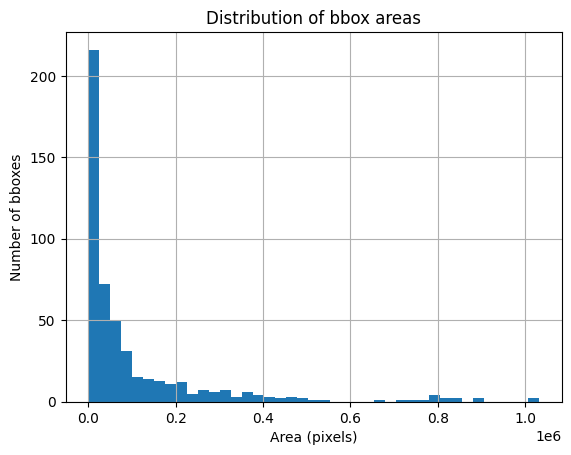

In [7]:
def get_bbox_images_size(df):
    images_width = [image['width'] for image in json_data['images']]
    images_height = [image['height'] for image in json_data['images']]
    bboxes_width = df['bbox'].apply(lambda x: x[2])
    bboxes_height = df['bbox'].apply(lambda x: x[3])
    print(
        f'IMAGE WIDTH -> MIN: {min(images_width)}, MAX: {max(images_width)}, AVG: {sum(images_width) / len(images_width)}'
    )
    print(
        f'IMAGE HEIGHT -> MIN: {min(images_height)}, MAX: {max(images_height)}, AVG: {sum(images_height) / len(images_height)}'
    )
    if min(images_height) == max(images_height) and min(images_width) == max(
        images_width
    ):
        print('-> All images are the same size.')
    print(
        f'\nBBOX WIDTH -> MIN: {bboxes_width.min():.2f}, MAX: {bboxes_width.max():.2f}, AVG: {bboxes_width.mean():.2f}'
    )
    print(
        f'BBOX HEIGHT -> MIN: {bboxes_height.min():.2f}, MAX: {bboxes_height.max():.2f}, AVG: {bboxes_height.mean():.2f}'
    )
    print(
        f'BBOX AREA -> MIN: {df["area"].min():.2f}, MAX: {df["area"].max():.2f}, AVG: {df["area"].mean():.2f}'
    )
    df['area'].hist(bins='auto')
    plt.title('Distribution of bbox areas')
    plt.xlabel('Area (pixels)')
    plt.ylabel('Number of bboxes')
    plt.show()


get_bbox_images_size(df)